In [10]:
import numpy
import random
import math
import collections
import matplotlib.pyplot as plt

In [11]:
n = 300;
x = numpy.random.uniform(0,1,n);
v = numpy.random.uniform(-0.1,0.1,n);

In [12]:
d = [];
for i in range(0,n):
    temp = numpy.sin(20*x[i]) + 3*x[i] + v[i];
    d.append(temp);
print len(d);

300


In [13]:
def tan_activation_function(v):
    return numpy.tanh(v);

In [14]:
def activation_function(v):
    return v;

In [15]:
def feedForwardNetwork(x_input,d_output,weight1,weight2,b1,b2):
    layer2_input = []
    layer2_output = [];
    for i in range(0,len(weight1)):
        temp = tan_activation_function((x_input * weight1[i]) + b1[i]);
        layer2_input.append((x_input * weight1[i]) + b1[i]);
        layer2_output.append(temp);
        
    v_vector = numpy.array(layer2_output);
    v_vector.resize(1,24);
    weight2.resize(24,1);
    
    y = activation_function(numpy.dot(v_vector,weight2) + b2);
    return layer2_input,layer2_output,y;

In [16]:
learning_rate = 0.01;
def feedBackNetwork(x_input,d_output,layer2_input,layer2_output,y_output,weight1,weight2,b1,b2):
    for i in range(0,len(weight2_initial)):
        #Weight 2 update:
        w2_update = -2 * learning_rate * ((d_output - y_output) * layer2_output[i]);
        weight2[i] = weight2[i] - w2_update;

        #Weight 1 update:
        w1_update = (1 - math.pow(numpy.tanh(layer2_input[i]),2));
        weight1[i] = weight1[i] - (-2 * learning_rate * weight2[i] * (d_output - y_output) * w1_update * x_input);
        
        #Update Bias 1:
        bias_1[i] = bias_1[i] - (-2 * learning_rate * weight2[i] * (d_output - y_output) * w1_update);
    b2 = b2 - (-2 * learning_rate * (d_output - y_output));
    return weight1,weight2,b1,b2;
    #v_temp,y_temp = feedForwardNetwork(x,weight1_initial,weight2_initial,bias_1,bias_25);

In [17]:
#Define Random Weights:
weight1_initial = numpy.random.uniform(-10,10,24);
bias_1 = numpy.random.uniform(-7,4,24);
weight2_initial = numpy.random.uniform(-7,8,24);
bias_25 = numpy.random.uniform(-1,1,1)[0];

EPOCH: 0   RMSE: 1.85220899656
EPOCH: 1   RMSE: 0.51687864303
EPOCH: 2   RMSE: 0.452428255852
EPOCH: 3   RMSE: 0.431896498228
EPOCH: 4   RMSE: 0.420149011306
EPOCH: 5   RMSE: 0.411640974412
EPOCH: 6   RMSE: 0.404759509738
EPOCH: 7   RMSE: 0.398855367455
EPOCH: 8   RMSE: 0.393610332737
EPOCH: 9   RMSE: 0.388843556809
EPOCH: 10   RMSE: 0.384439845321
EPOCH: 11   RMSE: 0.380319640372
EPOCH: 12   RMSE: 0.376424948888
EPOCH: 13   RMSE: 0.37271192673
EPOCH: 14   RMSE: 0.369146534248
EPOCH: 15   RMSE: 0.365701778836
EPOCH: 16   RMSE: 0.362355866512
EPOCH: 17   RMSE: 0.359090916397
EPOCH: 18   RMSE: 0.355892044209
EPOCH: 19   RMSE: 0.352746700106
EPOCH: 20   RMSE: 0.349644193224
EPOCH: 21   RMSE: 0.346575366619
EPOCH: 22   RMSE: 0.343532410193
EPOCH: 23   RMSE: 0.340508818809
EPOCH: 24   RMSE: 0.33749951866
EPOCH: 25   RMSE: 0.334501192824
EPOCH: 26   RMSE: 0.331512826767
EPOCH: 27   RMSE: 0.328536448427
EPOCH: 28   RMSE: 0.325577933894
EPOCH: 29   RMSE: 0.322647582428
EPOCH: 30   RMSE: 0.3197

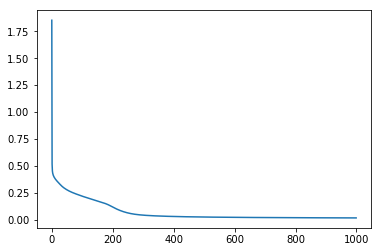

In [18]:
epochs = [];
rmse = [];
for epoch in range(0,1000):
    epochs.append(epoch);
    error = [];
    total_error = 0;
    for i in range(0,len(x)):
        layer2_input,layer2_output,y = feedForwardNetwork(x[i],d[i],weight1_initial,weight2_initial,bias_1,bias_25);
        error.extend(d[i] - y[0]);
        weight1_initial,weight2_initial,bias_1,bias_25 = feedBackNetwork(x[i],d[i],layer2_input,layer2_output,y,weight1_initial,weight2_initial,bias_1,bias_25);
        temp_w2 = [];
        for element in weight2_initial:
            temp_w2.append(element[0]);
            weight2_initial = numpy.array(temp_w2);

    for k in range(0,len(error)):
        total_error = total_error + (error[k]*error[k]);
        
    rmse.append(total_error/n);
    print "EPOCH:",epochs[epoch],"  RMSE:", rmse[epoch];
    if rmse[epoch] <= 0.01:
        break;
plt.plot(epochs,rmse)
plt.show()

In [21]:
print(weight2_initial)

[[ 4.32460276]
 [ 0.42684681]
 [ 4.46365437]
 [-3.96754229]
 [ 4.72619734]
 [-1.380015  ]
 [ 4.03736816]
 [ 1.0306214 ]
 [ 7.71854261]
 [ 4.82242935]
 [-2.42929342]
 [-6.33731217]
 [-4.32590382]
 [ 4.00494706]
 [ 7.3124271 ]
 [ 5.65014692]
 [ 2.4532337 ]
 [-4.8136895 ]
 [-5.54448324]
 [-0.6440253 ]
 [-2.31062731]
 [ 5.45561667]
 [ 2.20259811]
 [ 5.15410266]]


In [19]:
new_d = [];
for i in range(0,len(x)):
    layer2_input,layer2_output,y = feedForwardNetwork(x[i],d[i],weight1_initial,weight2_initial,bias_1,bias_25);
    new_d.append(y);

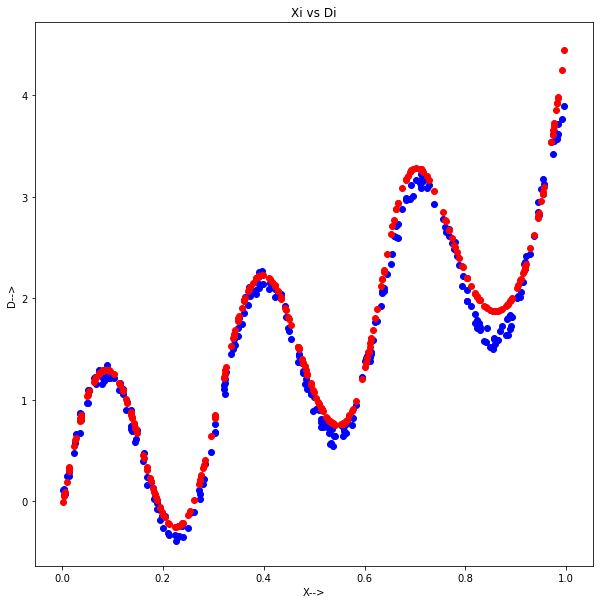

In [20]:
fig, ax = plt.subplots(figsize=(10,10));
plt.scatter(x,d, c = 'blue');
plt.scatter(x,new_d, c = 'red');
plt.title('Xi vs Di');
plt.ylabel('D-->');
plt.xlabel('X-->');
plt.show();